## Koncepcja scipy

typy danych zmienianie typów

In [37]:
import numpy as np
import scipy.stats as st

## Tworzenie i wymiary numpy

Tablice numpy tworzymy na wiele sposobów:

* w wyniku działania algorytmów języka Python
* poprzez import danych zewnętrznych (najczęściej za pomocą innych bibliotek)
* ręcznie, z obiektu iterowalnego, najczęściej listy

In [2]:
losowe = np.random.rand(12)
losowe

array([0.92556016, 0.48072233, 0.51017278, 0.84127871, 0.17760366,
       0.47201047, 0.26063738, 0.00502358, 0.17729248, 0.31742255,
       0.1187893 , 0.82518337])

In [3]:
reczne = np.array([[1,2,3,4],[3,6,7,8],[0,7,0,9]])
reczne

array([[1, 2, 3, 4],
       [3, 6, 7, 8],
       [0, 7, 0, 9]])

In [4]:
(losowe.shape,reczne.shape),(losowe.dtype,reczne.dtype)

(((12,), (3, 4)), (dtype('float64'), dtype('int64')))

W pierwszym przypadku tablica ma jeden wymiar, w w drugim dwa wymiary. Podobnie typ danych: w pierwszym przypadku `float64`, w drugim `int64`. Oba typy danych zostały ustalone na podstawie wprowadzonych danych. Domyślnie są to liczby całkowite i zimiennoprzecinkowe. W przypadku napisów typ danych `<U5` zawiera informację że jest to `character string (Unicode)` od długości do 5 znaków u mniej.

In [5]:
tekst = np.array(['kilka','literek'])
(tekst.shape,tekst.dtype) # max 7 znaków

((2,), dtype('<U7'))

In [6]:
tekst = np.array([*'kilkaliterek'])
tekst
(tekst.shape,tekst.dtype) # 1 znak

((12,), dtype('<U1'))

Tworzenie sekwencji 

In [29]:
np.zeros(10) # np.ones()
np.full((5,5),-1)
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Sposób organizacji danych w tablicach

Dane w tablicach są zorganizowane w: 
* wektory: 1 wymiar: (liczba elementów,) , 
* *macierze: 2 wymiary: (liczba wierszy, liczba kolumn) 
* *stosy macierzy: 3 wymiary: (liczba warstw, liczba wierszy, liczba kolumn). 
* Kolejne wymiary są możliwe ale trudne w obsłudze. 

Parametr `.shape` określa rozmiar tablicy w każdym wymiarze.


In [7]:
losowe = np.random.rand(12)
losowe.shape # 1 wymiar
losowe.shape = (3,4) # 3 wiersze, 4 kolumn
losowe.shape # 2 wymiary
losowe.shape = (3,2,2) # 3 warstwy, 2 kolumny, dwa wiersze
losowe.shape # 3 wymiary
losowe



array([[[0.67042146, 0.94728495],
        [0.26378626, 0.57218593]],

       [[0.80815303, 0.80332132],
        [0.63718976, 0.06787339]],

       [[0.11600786, 0.70352479],
        [0.02258524, 0.83373932]]])

Jak widać, wymiarowość tablic można dowolnie zmieniać. Ułożnie elementów pozostaje bez zmian, zmienia się jedynie sposób odczytywania danych:


In [8]:
losowe[0] # pobieramy 1 warstwę
losowe[1][1] # pobieramy 2 warstwę, drugi wiersz
losowe[1][1][1] # pobieramy 2 warstwę, drugi wiersz, drugą kolumnę

0.06787338890786188

In [9]:
losowe[1,1,1] # lub jako kolejne indeksy

0.06787338890786188

## Zarządzanie danymi tablicach

### Referencje

Tablice są modyfikowalne, podobnie jak listy. Zmienna wskazuje na tablicę. Każde przypisanie tablicy do innej zmiennej powoduje powstanie referencji, czyli zmienna wskazuje na ten sam obszar pamięci. Konsekwencją tego zabiegu jest, to że modyfikacja jednej tablicy powoduje modyfikację wszystkich referencji.

In [10]:
sekwencja = np.arange(12).reshape((3,4))
sekwencja
kopia_sekwencji = sekwencja
kopia_sekwencji[2,3]= 100
sekwencja

array([[  0,   1,   2,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10, 100]])

Można dokonywać operacji na wycinkach tablic. Rola wartości ujemnej w indeksie jest taka sama jak w przypadku list - oznacza indekspowanie od końca.

In [11]:
sekwencja[:-1,:-1]+sekwencja[1:,1:]


array([[  5,   7,   9],
       [ 13,  15, 106]])

### Przetwarzanie wierszami i kolumnami. Transpozycja

Jeżeli tablica dwuwymiarowa (macierz) wymaga przetwarzania wierszami lub kolumnami, można to uzyskać przez iterację po indeksach lub, znacznie wydajniej, poprzez iterację po wierszach (domyślnie) lub kolumnach, co wymaga wcześniejszej transpozycji macierzy. 

In [12]:
for row in sekwencja:
    print(row)

[0 1 2 3]
[4 5 6 7]
[  8   9  10 100]


In [13]:
for column in sekwencja.T:
    print(column)

[0 4 8]
[1 5 9]
[ 2  6 10]
[  3   7 100]


Transpozycja zamienia kolejność wzdłuż wierszy na kolejność wzdłuż kolumn. 
Metoda `flatten()` upraszcza wymiarowość do jednego wymiaru, łącząc dane wiersz po wierszu, a w przypadku macierzy trójwymiarowej, wiersz po wierszu w warstwie a następnie warstwy.

> UWAGA: Transpozycja dotyczy wszystkich wymiarów, ale powyżej dwóch jest trudna w zarządzaniu

In [14]:
sekwencja.flatten()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10, 100])

In [15]:
sekwencja.T.flatten()

array([  0,   4,   8,   1,   5,   9,   2,   6,  10,   3,   7, 100])

In [16]:
sekwencja.reshape(3,2,2)

array([[[  0,   1],
        [  2,   3]],

       [[  4,   5],
        [  6,   7]],

       [[  8,   9],
        [ 10, 100]]])

In [17]:
sekwencja.reshape(3,2,2).T

array([[[  0,   4,   8],
        [  2,   6,  10]],

       [[  1,   5,   9],
        [  3,   7, 100]]])

### Dostęp swobodny do wierszy i kolumn

Aby uzyskać dostęp do dowolnych wierszy/kolumn w dowolnej kolejności należu argumenty przesłać w formie obiektu iterowalnego: listy lub wektora. Nie można natomiast swobodnie indeksować jednocześnie wierszy i kolumn

In [18]:
sekwencja.reshape(3,4)[[0,1],[0,2]] # dziwny wynik
sekwencja.reshape(3,4)[[0,1]][:,[0,2]] #OK


array([[0, 2],
       [4, 6]])

## Operacje matematyczne i statystycznych. 

Numpy dostarcza kilkadziesiąt funkcji pozwalających na wykonywanie różnego rodzaju operacji matematycznych i statystycznych. Część funkcji bardziej zaawansowanych jest dostępna w pakiecie `scipy`

In [34]:
sekwencja =  np.random.rand(20,4)

In [36]:
sekwencja.mean(axis=0)


array([0.46638077, 0.46577563, 0.4531743 , 0.63354295])

In [40]:
st.skew(sekwencja,axis=0)
np.apply_along_axis(st.skew,0,sekwencja) # wygląda dokładnie tak jak apply w R

array([ 0.24603929, -0.27044684,  0.18603944, -0.51257883])

In [41]:
np.apply_along_axis(lambda x: np.sum(x)/np.std(x),0,sekwencja)

array([35.9783022 , 35.18242827, 29.47837419, 53.95097414])

## Algebra liniowa

In [20]:
X = [[4,5],[-2,6]]
y = [5,1]
np.linalg.solve(X,y)

array([0.73529412, 0.41176471])

In [21]:
X = [[2,2,11,9],[4,1,3,2],[9,16,12,1],[3,2,0,1]]
y = [10,9,8,7]
np.linalg.solve(X,y)

array([ 2.04537671, -0.29366438, -0.59674658,  1.45119863])

### Zadanie

Rozwiązać równanie:

$$ 
3 x_1 + 6 x_2 + 2 x_3 = 11 \\
4 x_1 - 2 x_2 - 2 x_3 = 0 \\
4 x_1 + 5 x_2 + 7 x_3 = 22
$$

### Zadanie

Dla poniższego zbioru punktów, wyznaczyć prostą regresji

In [22]:
x = np.array([.11,3.2,4.9,6.1,8.1,9.0,11.5,12.1])
y = np.array([0.5,2.2,5.4,4.1,7.5,11.2,12.1,11.9])

A = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A,y,rcond=None)[0]
a,b


(1.0613547671239152, -0.4356407174358238)

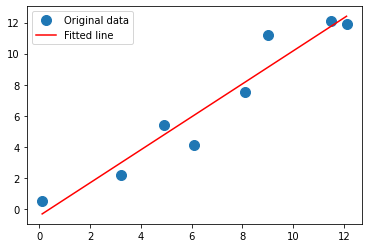

In [23]:
import matplotlib.pyplot as plt
_ = plt.plot(x, y, 'o', label='Original data', markersize=10)
_ = plt.plot(x, a*x + b, 'r', label='Fitted line')
_ = plt.legend()
plt.show()


## Maskowane macierze

In [57]:
macierz = np.round(np.random.rand(5,5)*10).astype(int) # losowe int
macierz

array([[ 8,  8,  8,  2, 10],
       [ 2,  6,  2,  3,  8],
       [ 9,  6,  8,  3,  8],
       [ 6,  9,  5,  6,  2],
       [ 0, 10, 10,  5,  2]])

In [58]:
macierz_invalid = 7/macierz
macierz_invalid

/tmp/ipykernel_13920/3033784962.py:1: RuntimeWarning: divide by zero encountered in true_divide
  macierz_invalid = 7/macierz


array([[0.875     , 0.875     , 0.875     , 3.5       , 0.7       ],
       [3.5       , 1.16666667, 3.5       , 2.33333333, 0.875     ],
       [0.77777778, 1.16666667, 0.875     , 2.33333333, 0.875     ],
       [1.16666667, 0.77777778, 1.4       , 1.16666667, 3.5       ],
       [       inf, 0.7       , 0.7       , 1.4       , 3.5       ]])

In [59]:
masked = np.ma.masked_values(macierz,0)
7/masked

masked_array(
  data=[[0.875, 0.875, 0.875, 3.5, 0.7],
        [3.5, 1.1666666666666667, 3.5, 2.3333333333333335, 0.875],
        [0.7777777777777778, 1.1666666666666667, 0.875,
         2.3333333333333335, 0.875],
        [1.1666666666666667, 0.7777777777777778, 1.4, 1.1666666666666667,
         3.5],
        [--, 0.7, 0.7, 1.4, 3.5]],
  mask=[[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [ True, False, False, False, False]],
  fill_value=0)

In [60]:
np.ma.masked_invalid(macierz_invalid)

masked_array(
  data=[[0.875, 0.875, 0.875, 3.5, 0.7],
        [3.5, 1.1666666666666667, 3.5, 2.3333333333333335, 0.875],
        [0.7777777777777778, 1.1666666666666667, 0.875,
         2.3333333333333335, 0.875],
        [1.1666666666666667, 0.7777777777777778, 1.4, 1.1666666666666667,
         3.5],
        [--, 0.7, 0.7, 1.4, 3.5]],
  mask=[[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [ True, False, False, False, False]],
  fill_value=1e+20)